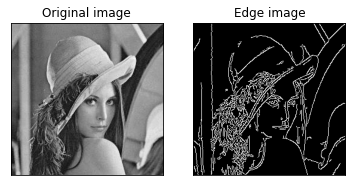

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('myImg\\Lenna.png', 0)
edges = cv2.Canny(img,100,200)  # Canny(image, 낮은임계값, 높은임계값)

plt.subplot(121), plt.imshow(img, cmap = 'gray')
plt.title('Original image'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge image'), plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
# 캐니 연습을 해보자
import cv2
import numpy as np
import matplotlib.pyplot as plt

def onTrackbar(th):
    # 가우시안 블러링 : 명암도 영상(흑백)에서 부드러운 영역을 제거하기 위해 사용
    e_edge = cv2.GaussianBlur(res_gray, (5,5), 0)
    # 캐니 에지 검출
    e_edge = cv2.Canny(e_edge, th, th*2, 5)
    
    h,w = img.shape[:2]
    cv2.rectangle(e_edge, (0,0,w,h), 255, -1)  # 흰색 사각형 그리기
    color_edge = cv2.bitwise_and(res_img, res_img, mask=e_edge)  # mask=e_edge : 컬러이미지의 에지부분만 복사
    cv2.imshow('edge', color_edge)
    

img = cv2.imread('myImg\\Lenna.png', cv2.IMREAD_COLOR)
if img is None: raise Exception('파일 오류')

th = 50
res_img = cv2.repeat(img, 1, 2)  # 가로로 반복
# BGR -> GRAY
res_gray = cv2.cvtColor(res_img, cv2.COLOR_BGR2GRAY)  # 흑백 -> 명암도 영상

cv2.namedWindow('edge', cv2.WINDOW_AUTOSIZE)  # 윈도우 생성
cv2.createTrackbar('Canny', 'edge', th, 100, onTrackbar)  # 트랙의 생성, onTrackbar 콜백함수생성

onTrackbar(th)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
# 모폴리지 객체
# 닫힌 연산 마스크 -> 명암도 -> 블러링 -> 소벨에지 -> 이진화 닫힘 연산(모폴리지)
# cv2.Sobel(src, ddepth, dx, dy[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
# Sobel(입력이미지, 출력이미지 비트, dx[x방향미분차수], dy[y방향으로 미분차수], ksize(커널의크기))
# (dx,dy) = (1,0) -> 가로 방향의 윤곽 검출
# (dx,dy) = (0,1) -> 세로 방향의 윤곽 검출
# (dx,dy) = (1,1) -> 대각선 오른쪽 방향으로 윤곽 검출
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지를 컬러로 읽자
image = cv2.imread('myImg\\car_number.jpg', cv2.IMREAD_COLOR)
# image = cv2.resize(image, (700,700))

# 닫힘 연산 마스크
mask = np.ones((5,17), np.uint8)  # cv2.MORPH_CLOSE

# 명암도 영상변환 = 흑백 이미지 변환
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 블러링 : 핸드폰 뽀샤시 작업 - 영상에서 화소값이 급격하게 변하는 부분을 감소시킨다
gray_img = cv2.blur(gray_img, (5,5))

# 소벨에지
gray_img = cv2.Sobel(gray_img, cv2.CV_8U, 1,0,5)  # 소벨 에지 : 운곽을 이용한 공간 필터 = cv2.filter2D()

# 이진화 닫힘 연산(모폴리지)
a, th_img = cv2.threshold(gray_img, 120, 255, cv2.THRESH_BINARY)  # 임계값으로 흰색, 검정색
morph_res = cv2.morphologyEx(th_img, cv2.MORPH_CLOSE, mask, iterations=3)

cv2.imshow('원본', image)
cv2.imshow('test', gray_img)
cv2.imshow('binary_img', th_img)
cv2.imshow('morph_res', morph_res)
cv2.waitKey(0)
cv2.destroyAllWindows()

블러링 산수
50  60  90  50  100
100 90  200 50  30
100 100 100 200 100
100 100 150 150 50
30  90  80  70  160
(입력 영상)(임의의 값)

1. 공통부분의 합 = 60+90 + 200+100 + 100
2. 022 = (50+100+100 + 공통부분의 합) / 9

75  98  90  50  100
83  99  104 50  30
98  116 127 200 100
100 100 150 150 50   -- 여기는 계산안했음
30  90  80  70  160
(출력영상)

<< 이미지 처리, 기하학 처리 -> 사상, 보간, 행렬연산을 이용한 어파인변환, 투영변환 >>
1. 사상(mapping)은 화소들의 배치를 변경할 때 입력영상의 좌표가 새롭게 배치될 영상 목적영상의 좌표를 찾아서 화소값을 옮기는 것
    - 순방향 사상
    - 역방향 사상

2. 오버랩(overlap), 홀(hole)은 사상에서 발생된다.
    - 홀(hole) : 목적영상의 좌표를 만드는 과정에서 사상되지 않은 화소
    - 오버랩(overlap) : 목적영상 += 원본 여러개의 화소(원본 여러개의 화소를 하나의 목적영상 화소로 사상되는 것)
    
3. 방법(보간법 Interpolation) : 목적영상에서 홀의 화소들을 채우고 오버랩이 되지 않게 하는 화소들을 배치하여 목적영상을 만드는 기법

4. 보간법 종류 : 최근접 이웃 보간법, 양선형 보간법, 3차회선 보간법
    - 최근접 이웃 보간법 : 목적영상을 만드는 과정에서 홀이 되어 항당 받지 못하는 화소들의 값을 찾을때 가장 가깝게 이웃한 입력 영상의 화소값을 가져오는 방법
    - 양선형 보간법 : 선형 보간을 두번에 걸쳐서 하는 보간법
    
5. cv2.resize(), cv2.remap(), cv2.warpAffine(), cv2.warpPerspective() -> 보간법에 따른 옵션을 사용
    ex) CV2.INTER_NEAREST, INTER_LINEAR, INTER_CUBIC
    
6. 2x3 크기와 어파인 변환 행렬을 이용해서 크기변경, 회전, 평형 이동 등을 복합적으로 사용한다
    - cv2.getAffineTransform(), getRotationMatrix2D()로 어파인 변환 행렬을 만들어 cv2.warpAffine()로 어파인 변환을 수행
    - 행렬의 곱으로 표현 가능 <회전>
    - 행렬의 곱으로 표현 가능 <크기변경>
    - 행렬의 곱으로 표현 가능 <평행이동>
    - 어파인 변한 수식
    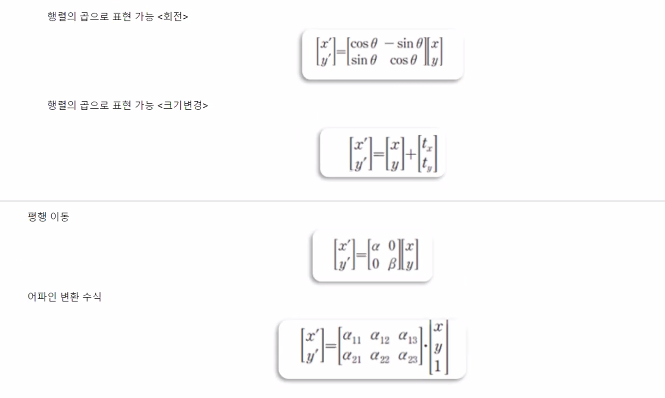
    
7. 원근법 사용 : 눈에 보이는 3차원을 2차원의 평면으로 옮겨서 사물간의 거리를 반영해 리턴
    - warpPerspective(), getPerspectiveTransform()

In [40]:
# warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst
# M : ndarray(2x3)
# dsize : 튜플로 출력 사이즈
# 1. 회전, 평행이동 -> 유클리드 변환(Euclidean transformation)
# 2. 회전 ,평행이동, 확대, 축소 -> 조합 상사변환(similarity transformation)
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

image = cv2.imread('myImg\\Lenna.png')
h,w,c = image.shape

# cv2.getRotationMatrix2D(center, angle, scale) -> retval
mat = cv2.getRotationMatrix2D((w/2, h/2), 45, 0.5)
print(mat)

affine_img = cv2.warpAffine(image, mat, (w,h), borderValue = (0,128,255))
affine_img02 = cv2.warpAffine(image, mat, (w,h), borderMode = cv2.BORDER_WRAP, dst=(img//4))
affine_img_near = cv2.warpAffine(image, mat, (w,h), flags=cv2.INTER_NEAREST)
affine_img_LINEAR = cv2.warpAffine(image, mat, (w,h), flags=cv2.INTER_LINEAR)


cv2.imshow('affine_img', affine_img)
cv2.imshow('affine_img02', affine_img02)
cv2.imshow('affine_img_near', affine_img_near)
cv2.imshow('affine_img_LINEAR', affine_img_LINEAR)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[  0.35355339   0.35355339  37.49033201]
 [ -0.35355339   0.35355339 128.        ]]


In [49]:
# 평행이동과 기울기 : sin, cos, tan, arcsin, arccos, arctan
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

image = cv2.imread('myImg\\Lenna.png')
w,h = image.shape[:2]

r = math.tan(math.radians(15))
print(r)

# mat = np.array([[1,r,50],
#                [0,1,20]], dtype=np.float32)  # x축으로 15도 기울림

mat = np.array([[1,0,50],
               [r,1,20]], dtype=np.float32)  # y축으로 15도 기울림

affine_img = cv2.warpAffine(image, mat, (int(w+h*r),h))

cv2.imshow('affine_img', affine_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

0.2679491924311227


In [59]:
# 이미지 마커를 출력해보자
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

image = cv2.imread('myImg\\Lenna.png')
w,h = image.shape[:2]

img_mark = img.copy()
src_pt = np.array([[30,30], [50,200], [200,50], [200,200]], dtype=np.uint8)

# cv2.drawMarker(img, position, color[, markerType[, markerSize[, thickness[, line_type]]]]) -> img
for pt in src_pt:
    cv2.drawMarker(img_mark, tuple(pt), (0,255,0), thickness=4)
    
cv2.imshow('img_mark', img_mark)

cv2.waitKey(0)
cv2.destroyAllWindows()